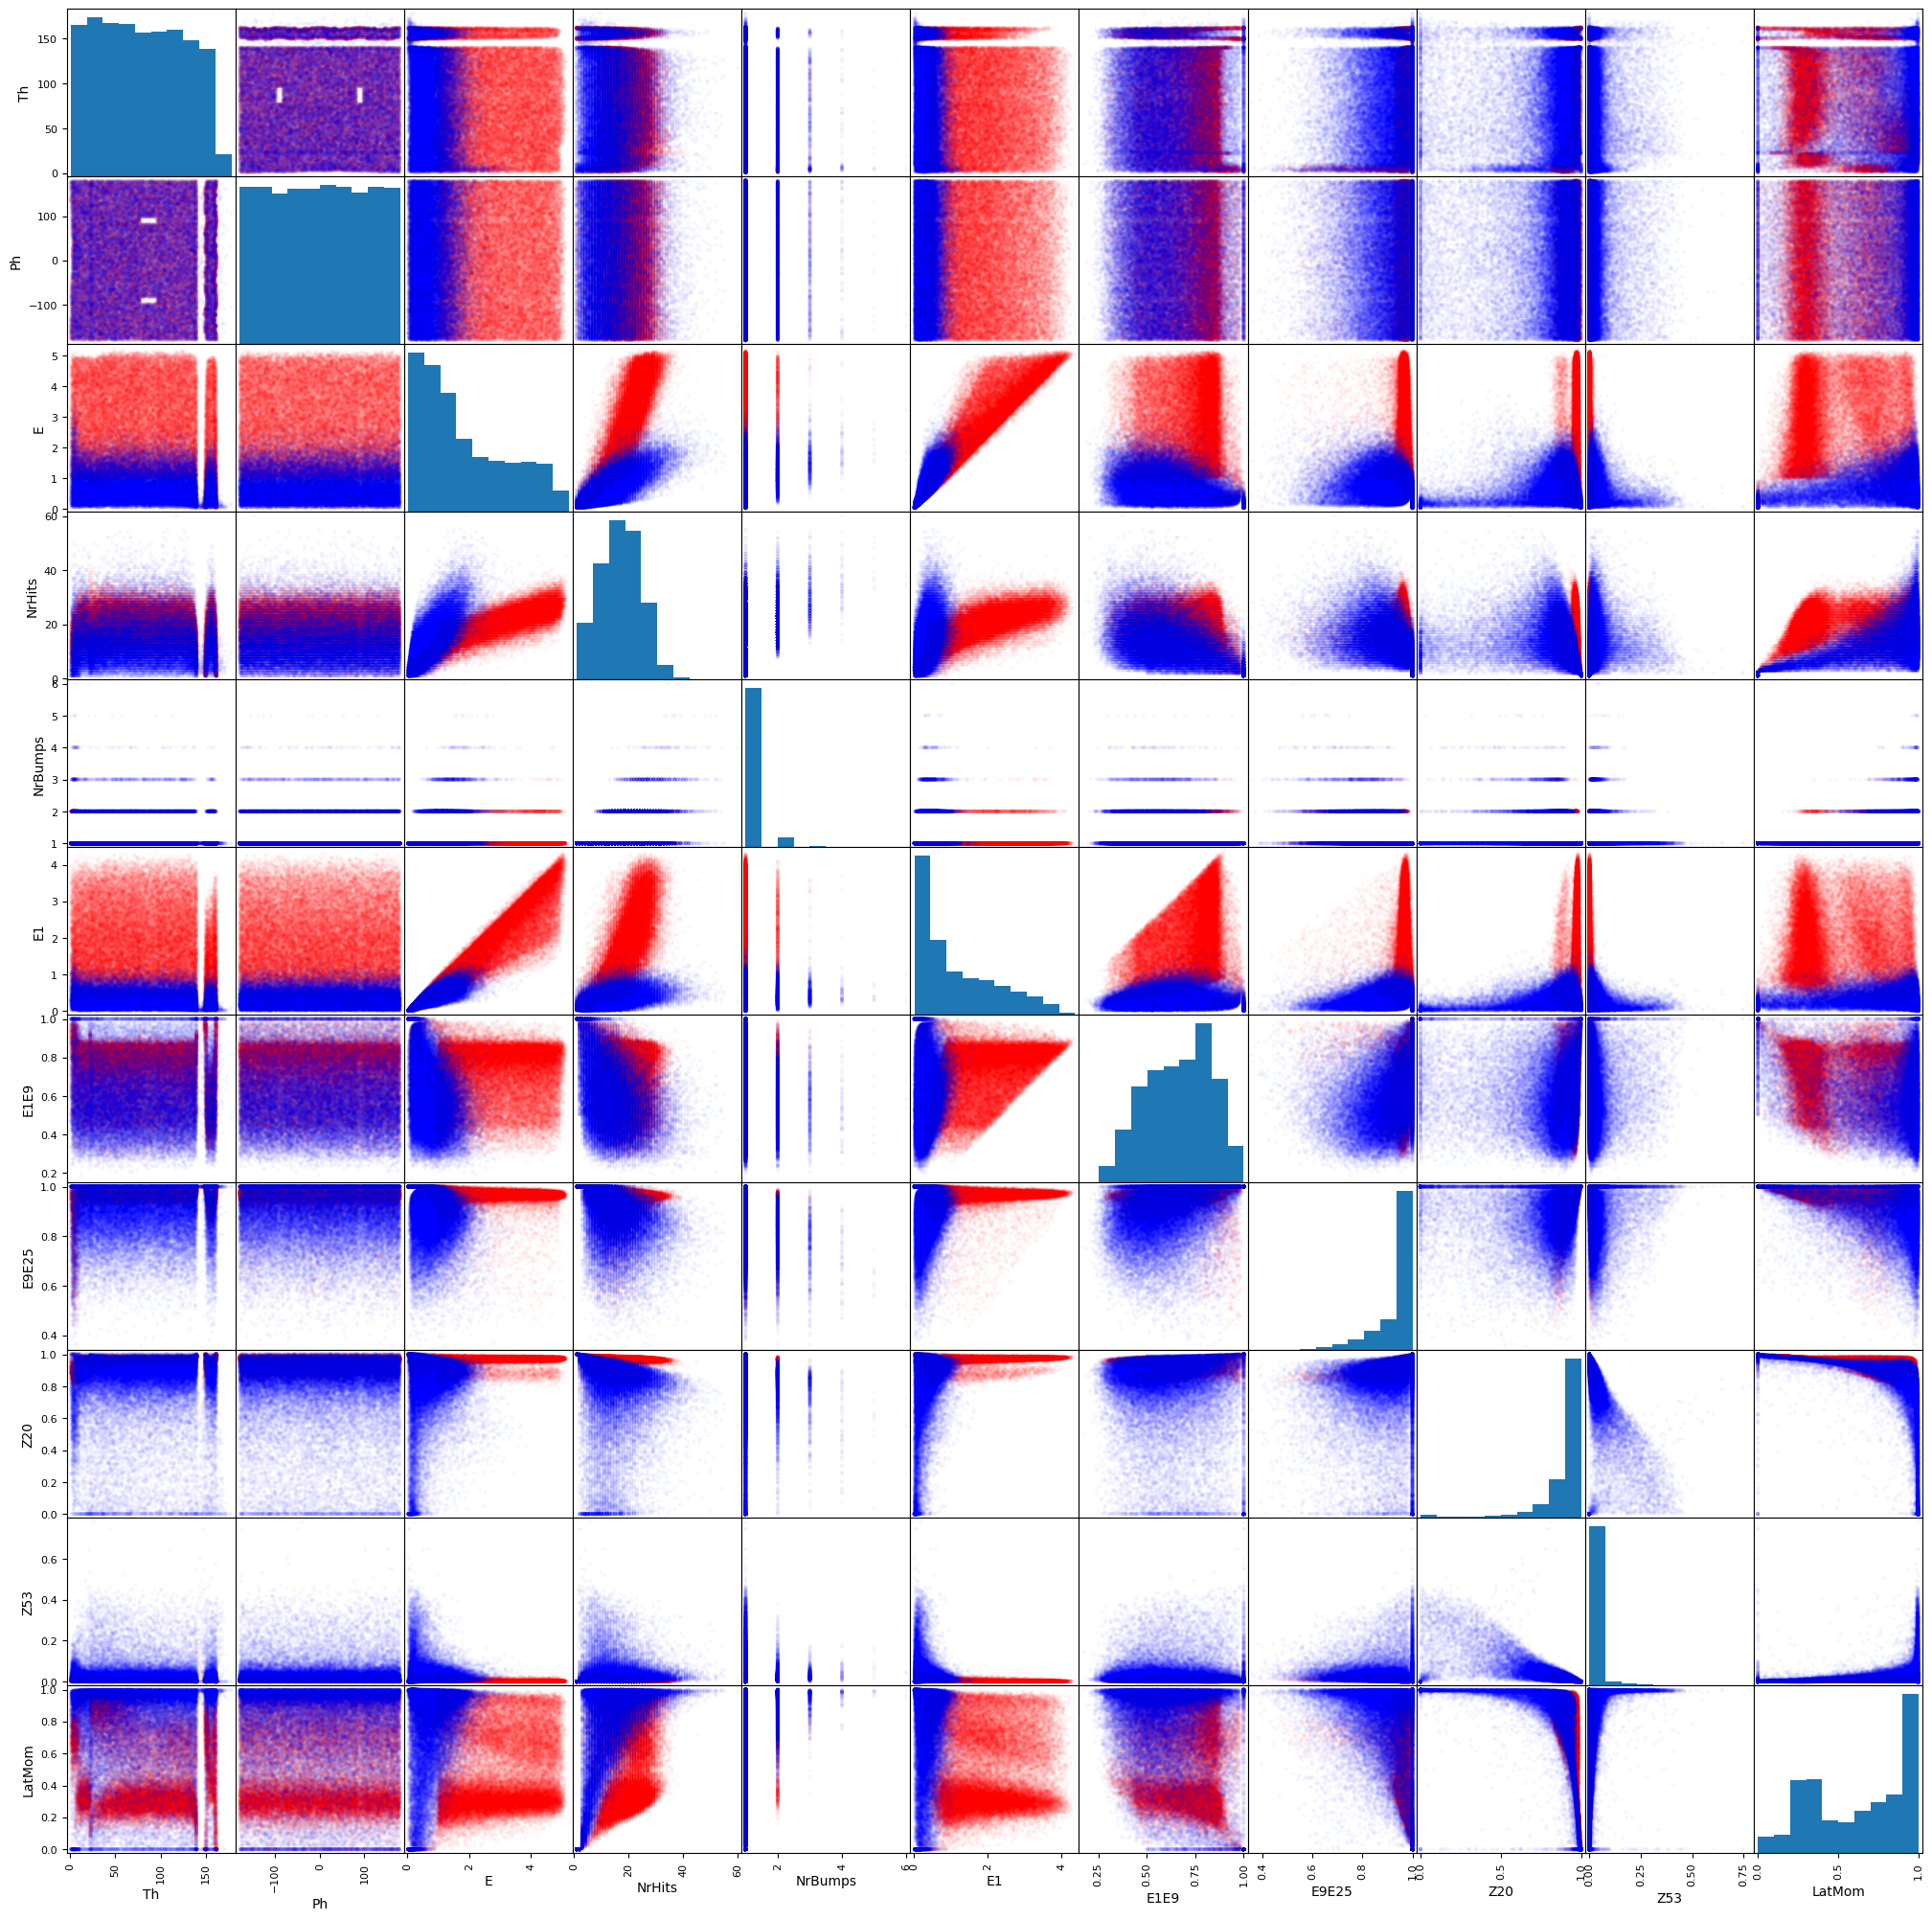

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# names=['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom'], delimiter=','
emc_gam  = pd.read_csv("https://transfer.sh/DXTWSG/emc_gam.csv")
emc_neutron = pd.read_csv("https://transfer.sh/QLpEb4/emc_neutron.csv")

# #rrggbb in hex
colors = ["#ff0000", "#0000ff"]

# Shove them into one big dataset for faster plotting.
dataset = pd.concat([emc_gam, emc_neutron])

# if i>len(emc_gam) we are plotting the emc_neutron and this expression evalues to False, which is just 0. 
# It will have colors[0] if True then colors[1]
something = pd.plotting.scatter_matrix(dataset, figsize=(25,25), diagonal='hist', alpha=0.03, color = [colors[i>len(emc_gam)] for i in range(len(dataset))])


plt.show()

From our observations we can conclude that the paramters which dont correlate, for both neutrons and gamma rays, are  consideredto be the most powerful ones as it will help us, later on, discard the neutrons.. However, the parameters that do have a significant correlation (ie. same parameter for both gamma and neutron)=are not considered that important, as by taking only one of those paramters, the behaviour ofthem both  can be succesfully describejust with 1 paramter so they are considered tohave the same span of data for that spcific parameterd. 
From the grap,h we concluded tha the diagonal subplots (when the paramters for both are the same) the kernel density estimation (kde) gives a both neutron and gamma. Other realtions we concluded were that, both Ph for gamma against Th for neutron, and viceversa, had the same correlation. 


In [22]:
emc_gam[['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom']].describe()


,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,4.336000e+04,43360.000000
mean,80.749479,-0.410604,2.902359,19.744211,1.022163,1.967300,0.716676,0.963544,0.968002,2.808279e-03,0.482873
std,46.762866,103.996747,1.179884,5.893862,0.154851,0.900559,0.140513,0.036491,0.023344,4.033629e-03,0.244087
min,0.595195,-179.986000,0.025090,1.000000,1.000000,0.014021,0.224754,0.436667,0.350785,1.054230e-50,0.000000
25%,40.473675,-90.818675,1.905425,16.000000,1.000000,1.232017,0.620547,0.960356,0.966239,1.281237e-03,0.288124
50%,79.210700,-0.410285,2.895825,20.000000,1.000000,1.882490,0.754330,0.968749,0.972596,2.097985e-03,0.384048
75%,119.839750,88.966775,3.916097,24.000000,1.000000,2.640420,0.826166,0.976497,0.977766,3.251785e-03,0.700759
max,163.211000,179.958000,5.234740,47.000000,6.000000,4.369720,1.000000,1.000000,1.000000,3.341460e-01,0.996175


In [23]:
emc_neutron[['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,78.625170,0.705105,0.760000,13.929376,1.122564,0.341868,0.612911,0.893528,0.809153,0.034600,0.769180
std,47.212387,103.985196,0.502411,8.012129,0.381821,0.229777,0.176559,0.101082,0.209241,0.056912,0.276143
min,0.499105,-180.001000,0.024076,1.000000,1.000000,0.006992,0.171400,0.356098,0.000000,0.000000,0.000000
25%,37.196675,-89.329050,0.366767,8.000000,1.000000,0.168263,0.477409,0.838244,0.780413,0.007268,0.649031
50%,76.319900,1.788705,0.666409,13.000000,1.000000,0.299559,0.595015,0.916345,0.879204,0.016139,0.899504
75%,118.370000,90.577475,1.054273,19.000000,1.000000,0.467397,0.735480,0.976849,0.934041,0.034914,0.973680
max,178.647000,180.000000,3.832530,60.000000,6.000000,2.533030,1.000000,1.000000,1.000000,0.779841,0.999937


Note: energy ( All), lat moments agaisnt number if hits , talk about z20 


In [ ]:
scaler = StandardScaler()